# Assignment 6

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?
#### 朴素贝叶斯（Naive Bayes）算法理论基础是基于贝叶斯定理和条件独立性假设的一种分类方法。假设各个特征之间相互条件独立的。

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?
#### 极大似然估计是建立在极大似然原理的基础上的一个统计方法，是概率论在统计学中的应用。极大似然估计提供了一种给定观察数据来评估模型参数的方法； 最大后验估计是根据经验数据获得对难以观察的量的点估计。与最大似然估计类似，但是最大的不同时，最大后验估计的融入了要估计量的先验分布在其中。故最大后验估计可以看做规则化的最大似然估计。公式上来看 MAP=MLE*p(theta)，但是这两种算法有本质的区别，MLE将theta视为一个确定未知的值，而MAP则将theta视为一个随机变量。

#### 3. What is support vector in SVM?
#### 距离超平面最近的训练样本使w*x+b>=1 和w*x+b<=-1成立，它们被称为支持向量 

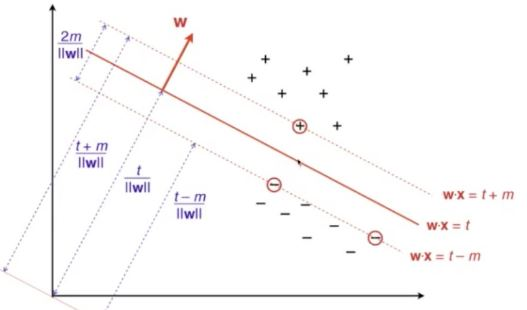

In [3]:
from IPython.display import Image
Image(filename = './SVM.jpg', width=500, height=300)

#### 4. What is the intuition behind SVM ?
#### SVM通过两个异类支持向量到超平面的距离最大化，找到满足约束条件的参数w和b，使得间隔最大。优点是可进行全局优化，通过kernal trick进行非线性分割，避免维度复杂

#### 5. Shortly describ what 'random' means in random forest ?
#### 机森林就是通过集成学习的思想将多棵树集成的一种算法，它的基本单元是决策树，而它的本质属于机器学习的一大分支——集成学习（Ensemble Learning）方法。随机包含两方面：一是随机选取样本，一个是随机选取特征。

#### 6. What cariterion does XGBoost use to find the best split point in a tree ?
#### 遍历每个特征的所有可能分割点的贪心策略

### 3. Practial part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

###### 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('./sqlResult_1558435.csv',encoding='gb18030')
df.head(5)

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [6]:
# 处理数据
# 缺失数据直接drop掉
# 属于新华社的内容标签为1，其余为0
new_df = df.dropna(subset=['content'])
new_df.loc[new_df['source']=='新华社','y'] = 1
new_df.loc[new_df['source']!='新华社','y'] = 0
data = new_df[['content','y']]
print(data.head(5))

                                             content    y
0  此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...  0.0
1  骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...  0.0
2  此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...  0.0
3    这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n  1.0
4  （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...  0.0


D:\Anaconda\anzhuang\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\anzhuang\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
data['y'].value_counts()

1.0    78661
0.0     8393
Name: y, dtype: int64

In [8]:
# 文本清洗与分词

import jieba
import re

content = data['content'].tolist()
y = data['y'].values

def text_clean(text):
    temp = ' '.join(jieba.cut(text))
    new_text = ' '.join(re.findall(r'\w+',temp))
    return new_text

clearn_data = []
for i in range(len(content)):
    new_content = text_clean(content[i])
    clearn_data.append(new_content)
print(clearn_data[0])

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\LGP\AppData\Local\Temp\jieba.cache
Loading model cost 2.634 seconds.
Prefix dict has been built successfully.


此外 自 本周 6 月 12 日 起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI 9 的 研发 之中 MIUI 8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI 9 的 确切 信息 我们 还是 等待 官方消息


In [9]:
# 保存数据
import pickle

save_clearn_data = clearn_data
f = open('save_clearn_data', 'wb')
pickle.dump(save_clearn_data, f) # 序列化对象，将对象obj保存到文件file中去
f.close()

In [10]:
f = open('save_clearn_data', 'rb')
tmp = pickle.load(f) # 反序列化对象，将文件中的数据解析为一个python对象。file中有read()接口和readline()接口
f.close()
print(tmp[0])

此外 自 本周 6 月 12 日 起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI 9 的 研发 之中 MIUI 8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI 9 的 确切 信息 我们 还是 等待 官方消息


In [12]:
# 抽取文本特征
from sklearn.feature_extraction.text import TfidfVectorizer

TV = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", max_df=0.6, stop_words=["是", "的"],max_features=200)
X = TV.fit_transform(clearn_data) # 得到词频矩阵

In [13]:
X.shape

(87054, 200)

In [22]:
# 切分数据集
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [23]:
X_train.shape

(69643, 200)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def train_scores(model):
    p = cross_val_score(model,X_train,y_train,cv=3,scoring='precision')
    r = cross_val_score(model,X_train,y_train,cv=3,scoring='recall')
    f1 = cross_val_score(model,X_train,y_train,cv=3,scoring='f1')
    auc = cross_val_score(model,X_train,y_train,cv=3,scoring='roc_auc')
    print('precision is {}'.format(p))
    print('recall is {}'.format(r))
    print('f1 is {}'.format(f1))
    print('roc_auc is {}'.format(auc))
def test_scores(y_test,y_pred,y_prob):
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    print('precision is {}'.format(p))
    print('recall is {}'.format(r))
    print('f1_score is {}'.format(f1))
    print('roc_auc is {}'.format(roc))

In [27]:
# SVM
from sklearn.svm import SVC

svc_clf = SVC(C=10,kernel='linear')

In [28]:
svc_clf.fit(X_train,y_train)
svc_clf.score(X_test,y_test)

0.968640514617196

In [29]:
y_pred = svc_clf.predict(X_test)
y_pred_proba = svc_clf.decision_function(X_test)

In [30]:
test_scores(y_test,y_pred,y_pred_proba)

precision is 0.982830980541778
recall is 0.9824561403508771
f1_score is 0.9826435246995995
roc_auc is 0.9892738812876251


In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(max_depth=8)

D:\Anaconda\anzhuang\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
rfc_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc_clf.score(X_train,y_train)

0.9558893212526743

In [34]:
train_scores(rfc_clf)

precision is [0.94777238 0.95049415 0.95391579]
recall is [0.99451781 0.99175248 0.99504195]
f1 is [0.97579683 0.97092712 0.97211749]
roc_auc is [0.98041564 0.97444945 0.9793313 ]
